In [1]:
import sys
sys.path.append("../..")

import helper as hlp
import pandas as pd

[nltk_data] Downloading package stopwords to C:\Users\Abdul
[nltk_data]     Manaf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
EPOCHS = 50
MAX_LEN = 30
N_CLASSES = 2
BATCH_SIZE = 128
LEARNING_RATE = 2e-5
NAME = 'mBert(bert)-sindhi'
MODEL_NAME = 'bert-base-multilingual-uncased'
dir = '../../../Dataset Statistics/dataset'
path = f'../saved_models/{NAME}'

In [3]:
train_df = pd.read_csv(f'{dir}/train.csv')
val_df = pd.read_csv(f'{dir}/val.csv')
test_df = pd.read_csv(f'{dir}/test.csv')

train_texts = train_df['sindhi_text'].values
val_texts = val_df['sindhi_text'].values
test_texts = test_df['sindhi_text'].values

train_labels = train_df['class'].values
val_labels = val_df['class'].values
test_labels = test_df['class'].values

In [4]:
#show 5 values along with their labels
for i in range(5):
    print(train_texts[i], train_labels[i])

منهنجو هي آرلينڊو ۾ مئل ۽ زخمين جي دوستن ۽ ڪٽنب لاءِ درد آهي...senseless #orlandohorror #prayers 0
هن هفتي جي آخر ۾ اسان جي نئين گهر ۾ منتقل ٿيڻ جو انتظار نٿو ڪري سگھجي ð borda ⁇ « ۽ هڪ هفتي لاءِ ð ⁇  @user â ⁇ ¤aytâ ⁇ ¤ay attâ ⁇ ¤ait 0
#صفائي # جڳھون. ٺاھڻ # منهن.  0
رستي تي اتحادي پالي #boxcup @user @user @user @user  0
مھرباني ڪري فالو ڪريو https://t.co/rC6EFF0AVH 0


In [5]:
#show 5 values along with their labels
for i in range(5):
    print(hlp.preprocess_text(train_texts[i], language="sindhi")
    , train_labels[i])

منهنجو آرلينڊو ۾ مئل زخمين جي دوستن ڪٽنب لاءِ درد آهيsenseless 0
هن هفتي جي ۾ اسان جي نئين گهر ۾ منتقل جو انتظار نٿو ڪري سگھجي ð borda ⁇ « هفتي لاءِ ð ⁇ â ⁇ ¤aytâ ⁇ ¤ay attâ ⁇ ¤ait 0
جڳھون ٺاھڻ منهن 0
رستي اتحادي پالي 0
مھرباني ڪري فالو ڪريو 0


In [6]:
## apply preprocessing to all texts
train_texts = [hlp.preprocess_text(text, language="sindhi") for text in train_texts]
val_texts = [hlp.preprocess_text(text, language="sindhi") for text in val_texts]
test_texts = [hlp.preprocess_text(text, language="sindhi") for text in test_texts]

In [7]:
## mbert model and tokenizer
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)

from transformers import BertForSequenceClassification
model = BertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=N_CLASSES)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
model.to(device)

c:\Users\Abdul Manaf\AppData\Local\Programs\Python\Python39\lib\site-packages\huggingface_hub\utils\_runtime.py:184: UserWarning: Pydantic is installed but cannot be imported. Please check your installation. `huggingface_hub` will default to not using Pydantic. Error message: '{e}'
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(105879, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elemen

In [8]:
train_data_loader = hlp.create_data_loader(train_texts, train_labels, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = hlp.create_data_loader(val_texts, val_labels, tokenizer, MAX_LEN, BATCH_SIZE)

history = hlp.train_model(train_data_loader, val_data_loader, model, optimizer, device, EPOCHS, tokenizer, path)

Epoch 1/50
----------


Training Progress: 100%|██████████| 618/618 [03:18<00:00,  3.11it/s, loss=0.389]


Train loss 0.35220666974782944 accuracy 0.8363696210864804
Validation loss 0.3313914165624137 accuracy 0.8531712875047475
Model and tokenizer saved at epoch 1
Checkpoint saved: Improved validation accuracy at epoch 1: 0.8531712875047475
Metrics logged at epoch 1
Epoch 2/50
----------


Training Progress: 100%|██████████| 618/618 [03:23<00:00,  3.04it/s, loss=0.186]


Train loss 0.2798182522594736 accuracy 0.8765017913886743
Validation loss 0.29929249957927223 accuracy 0.8629320167109761
Model and tokenizer saved at epoch 2
Checkpoint saved: Improved validation accuracy at epoch 2: 0.8629320167109761
Metrics logged at epoch 2
Epoch 3/50
----------


Training Progress: 100%|██████████| 618/618 [03:21<00:00,  3.06it/s, loss=0.236]


Train loss 0.24573720576886607 accuracy 0.8913646203901809
Validation loss 0.2985812017639864 accuracy 0.8628940372199013
No improvement in validation accuracy for 1 epochs.
Metrics logged at epoch 3
Epoch 4/50
----------


Training Progress: 100%|██████████| 618/618 [03:19<00:00,  3.10it/s, loss=0.116]


Train loss 0.21206444201683536 accuracy 0.9069237488764258
Validation loss 0.3216436448534137 accuracy 0.8782757311052032
Model and tokenizer saved at epoch 4
Checkpoint saved: Improved validation accuracy at epoch 4: 0.8782757311052032
Metrics logged at epoch 4
Epoch 5/50
----------


Training Progress: 100%|██████████| 618/618 [03:21<00:00,  3.07it/s, loss=0.0849]


Train loss 0.18093405796582646 accuracy 0.922343617465723
Validation loss 0.3498242939777166 accuracy 0.8768704899354349
No improvement in validation accuracy for 1 epochs.
Metrics logged at epoch 5
Epoch 6/50
----------


Training Progress: 100%|██████████| 618/618 [03:19<00:00,  3.09it/s, loss=0.0224]


Train loss 0.1495532146127575 accuracy 0.9368139867576498
Validation loss 0.40077466651507954 accuracy 0.8764527155336119
No improvement in validation accuracy for 2 epochs.
Metrics logged at epoch 6
Epoch 7/50
----------


Training Progress: 100%|██████████| 618/618 [03:19<00:00,  3.09it/s, loss=0.0115]


Train loss 0.13059602217435307 accuracy 0.9456759801997746
Validation loss 0.4608414968095937 accuracy 0.8734903152297759
No improvement in validation accuracy for 3 epochs.
Metrics logged at epoch 7
Epoch 8/50
----------


Training Progress: 100%|██████████| 618/618 [03:19<00:00,  3.10it/s, loss=0.0357]


Train loss 0.1128830502448682 accuracy 0.9532213346162124
Validation loss 0.3833059460937398 accuracy 0.8676794530953286
No improvement in validation accuracy for 4 epochs.
Metrics logged at epoch 8
Epoch 9/50
----------


Training Progress: 100%|██████████| 618/618 [03:19<00:00,  3.09it/s, loss=0.00414]


Train loss 0.09432630193145482 accuracy 0.9613996885642304
Validation loss 0.4655005298916576 accuracy 0.8619825294341056
No improvement in validation accuracy for 5 epochs.
Stopping early due to lack of improvement in validation accuracy.


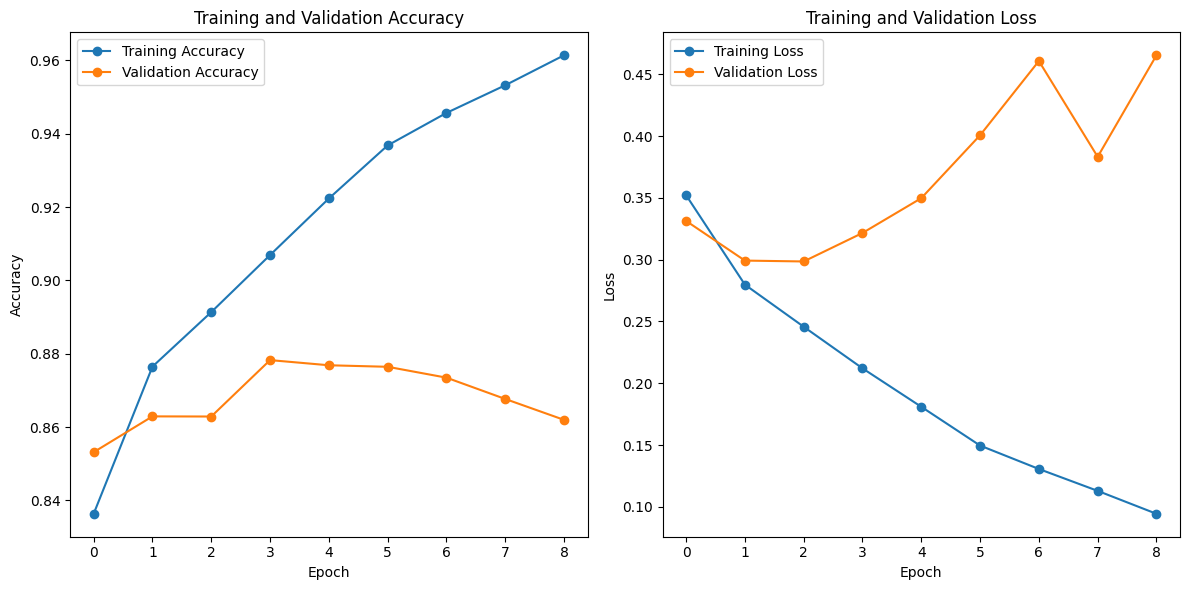

In [9]:
hlp.plot_history(history)

In [7]:
import os
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

def extract_epoch_number(dir):
    files = os.listdir(dir)
    epoch = 0
    for file in files:
        if 'model_epoch' in file:
            epoch = max(epoch, int(file.split('_')[-1]))
    return epoch

path = f'../saved_models/{NAME}'
epoch = extract_epoch_number(path)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = AutoTokenizer.from_pretrained(f'{path}/tokenizer')
model = AutoModelForSequenceClassification.from_pretrained(f'{path}/model_epoch_{epoch}', num_labels=N_CLASSES)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
model = model.to(device)

c:\Users\Abdul Manaf\AppData\Local\Programs\Python\Python39\lib\site-packages\huggingface_hub\utils\_runtime.py:184: UserWarning: Pydantic is installed but cannot be imported. Please check your installation. `huggingface_hub` will default to not using Pydantic. Error message: '{e}'
  warnings.warn(


In [8]:
test_data_loader = hlp.create_data_loader(test_texts, test_labels, tokenizer, MAX_LEN, BATCH_SIZE)

test_acc, test_loss, test_label_actual, test_label_pred = hlp.eval_model(model, test_data_loader, device)

print(f'Test Accuracy: {test_acc} Test Loss: {test_loss}')

Test Accuracy: 0.8364603114318269 Test Loss: 0.3837457128520151


Accuracy: 0.84
F1 Score: 0.84
Precision: 0.86
Recall: 0.84

Classification Report:
              precision    recall  f1-score   support

    Non-Hate       0.93      0.82      0.87     18156
        Hate       0.69      0.86      0.77      8174

    accuracy                           0.84     26330
   macro avg       0.81      0.84      0.82     26330
weighted avg       0.86      0.84      0.84     26330



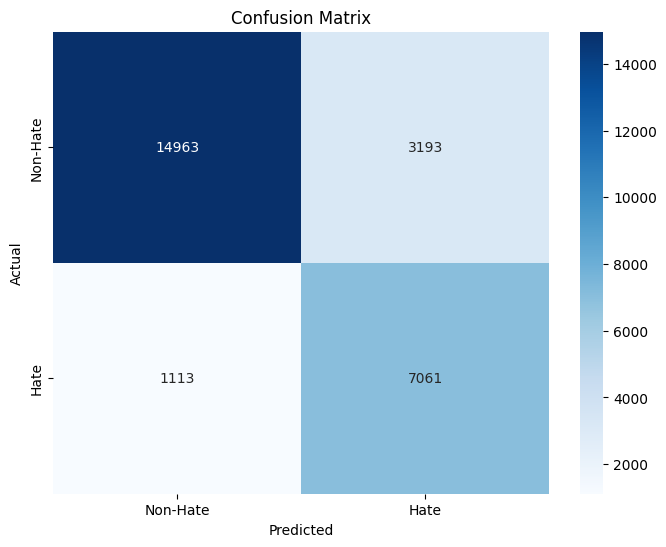

In [9]:
hlp.plot_confusion_matrix(test_label_actual, test_label_pred, ['Non-Hate', 'Hate'])

In [10]:
test_texts = ["This is the sort of thing that happens in a shithole country. @URL"]
preds, confidence = hlp.predict(test_texts, model, tokenizer, MAX_LEN, device)

if preds[0] == 1:
    print(f'Predicted class: Hate Speech \nConfidence: {confidence[0][1]:.2f}')
else:
    print(f'Predicted class: Not Hate Speech \nConfidence: {confidence[0][0]:.2f}')

Predicted class: Hate Speech 
Confidence: 0.98
